<h2>Muhammad Abdullah
STU-DS-251-930
</h2>

<h1>Heart Disease Prediction</h1>

<h3>Importing Libraries</h3>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

<h3>Load Dataset</h3>

In [176]:
dataset= pd.read_csv("heart.csv")

<h3>To display the first 5 and last 5 rows </h3>

In [177]:
print(f"Top 5 rows:\n {dataset.head()}")
print(f"Last 5 rows:\n {dataset.tail()}")

Top 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Last 5 rows:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0       

<h3>Check the total number of NULL values contain in specific features.</h3>

In [178]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Check and represent the total information of dataset for preprocessing</h3>

In [179]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<h3>To display the values for each feature like mean, standard daviation, minimum value, maximum value...

In [180]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h3>Check the correlations of different features for target feature.</h3>

In [181]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


<h3>To count total number of 0 and 1 values.</h3>

target
1    526
0    499
Name: count, dtype: int64


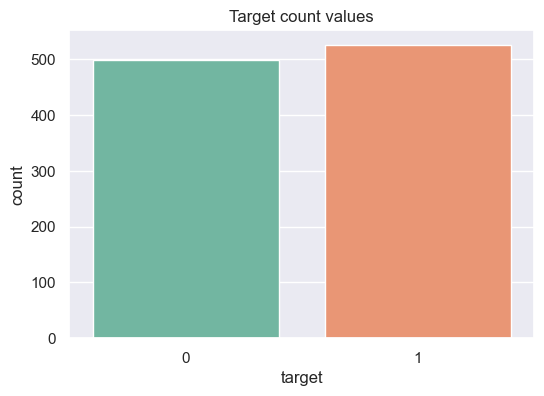

In [182]:
print(dataset['target'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=dataset.target,palette="Set2")
plt.title("Target count values")
plt.show()

<h3>Seperate the features as for dependent and independent variables.</h3>

In [183]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

<h3>To do feature scalling for better training model and within range of -1,1 </h3>

In [184]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
x=SS.fit_transform(x)

<h3>Spliting the data for training and testing</h3>

In [185]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x , y , test_size=0.2, random_state=42)

<h3>Importing and training models.</h3>

In [186]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()
L_model.fit(x_train , y_train)

LogisticRegression()

In [187]:
from sklearn.svm import SVC
svm_model= SVC()
svm_model.fit(x_train , y_train)

SVC()

In [188]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train , y_train)


DecisionTreeClassifier()

In [189]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=20)

<h3>Predict values by giving x_test.</h3>

In [190]:
# prediction for Logistic Regression
L_pred= L_model.predict(x_test)

# prediction for Support Vector Machine  
svm_pred= svm_model.predict(x_test)

# prediction for Decision Tree
DT_pred= DT_model.predict(x_test)

# prediction for Random Forest
RF_pred= RF_model.predict(x_test)

<h3>Make the model evaluation for Logictic Regresion.</h3>

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, L_pred))
print("Precision:", precision_score(y_test, L_pred))
print("Recall:", recall_score(y_test, L_pred))
print("F1 Score:", f1_score(y_test, L_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, L_pred))

Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1 Score: 0.8108108108108109
Confusion Matrix:
 [[73 29]
 [13 90]]


<h3>Visualization of Confusion Matrix.</h3>

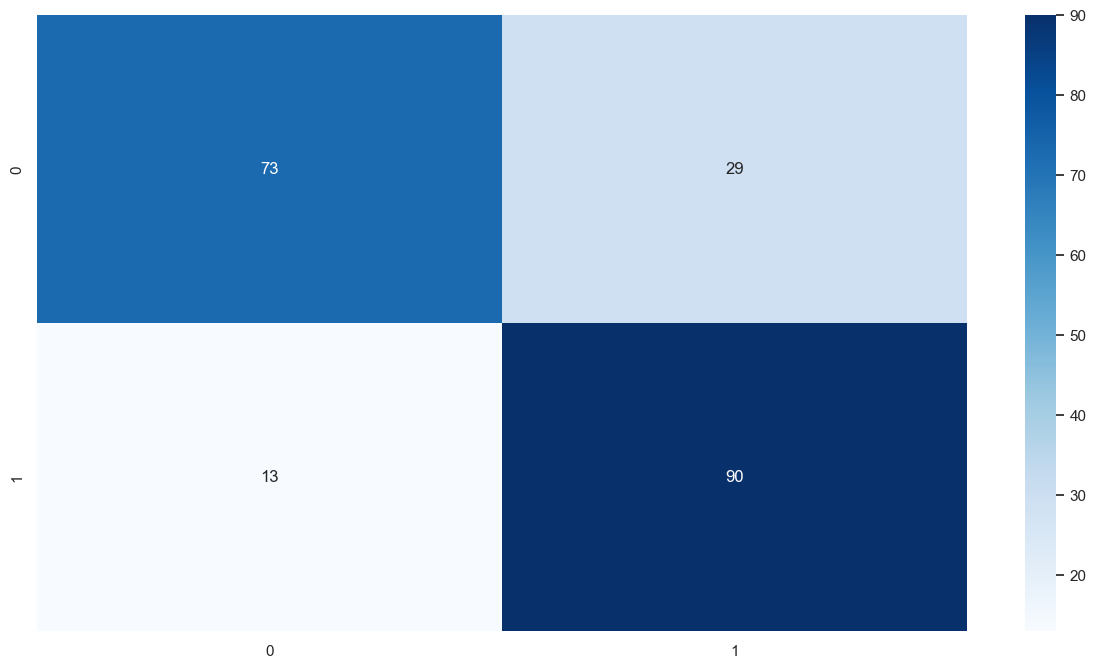

In [192]:
sns.heatmap(confusion_matrix(y_test, L_pred), annot=True, cmap='Blues')
plt.show()

<h3>Make the model evaluation for Support Vector Machine Classifier.</h3>

In [193]:
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Accuracy: 0.8878048780487805
Precision: 0.8508771929824561
Recall: 0.941747572815534
F1 Score: 0.8940092165898618
Confusion Matrix:
 [[85 17]
 [ 6 97]]


<h3>Visualization of Confusion Matrix.</h3>

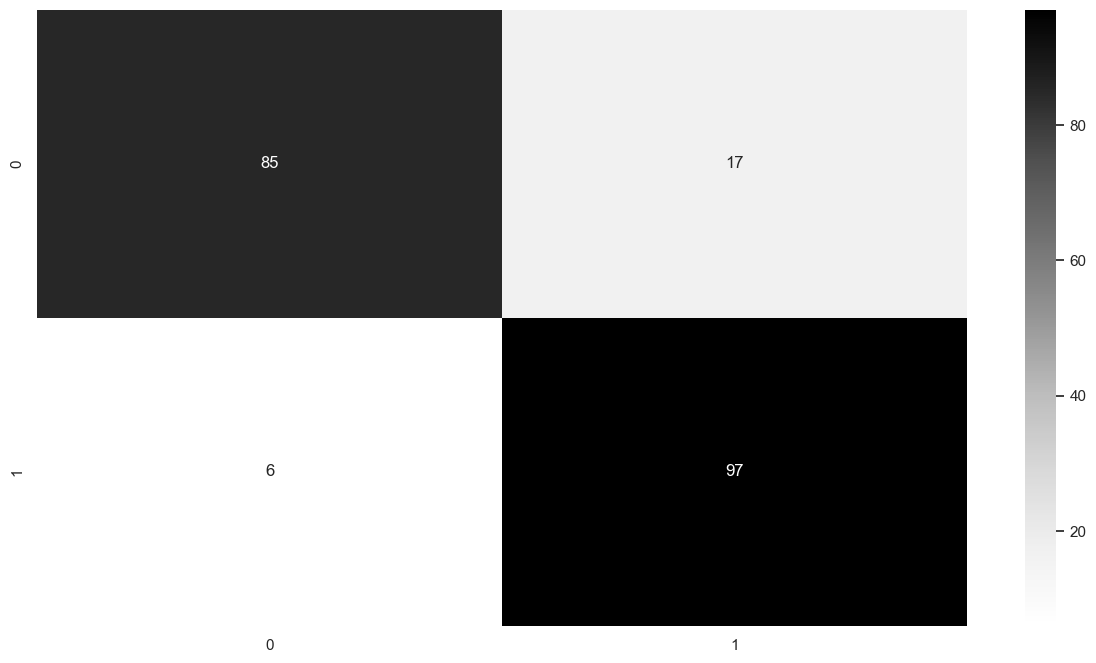

In [194]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Greys')
plt.show()

<h3>Make the model evaluation for Decision Tree.</h3>

In [195]:
print("Accuracy:", accuracy_score(y_test, DT_pred))
print("Precision:", precision_score(y_test, DT_pred))
print("Recall:", recall_score(y_test, DT_pred))
print("F1 Score:", f1_score(y_test, DT_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, DT_pred))

Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473
Confusion Matrix:
 [[102   0]
 [  3 100]]


<h3>Visualization of Confusion Matrix.</h3>

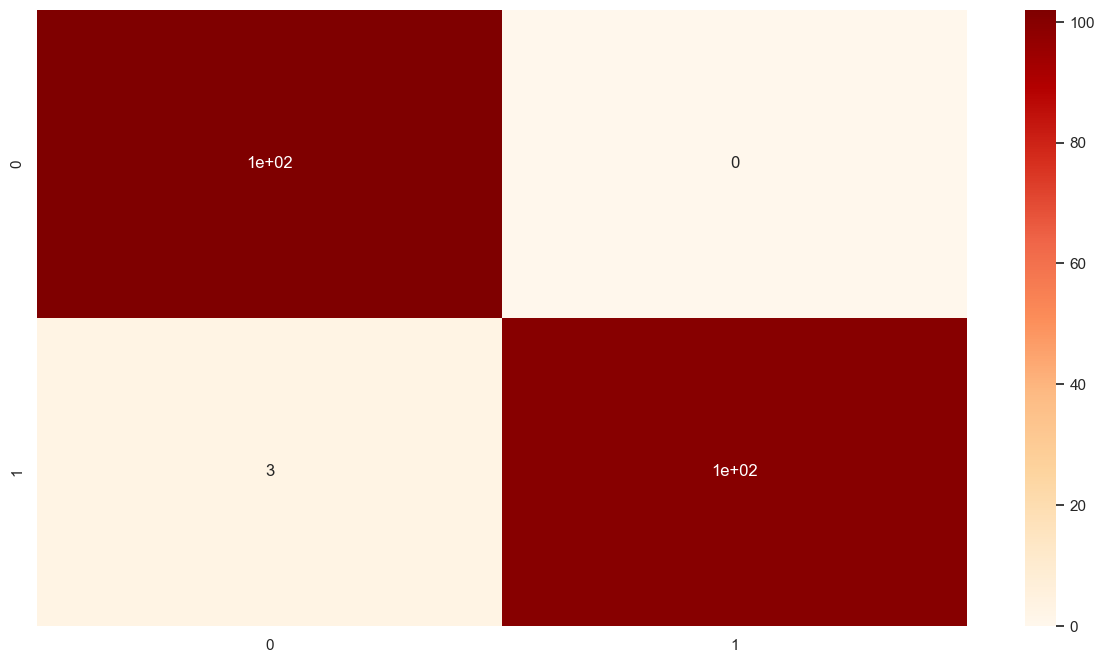

In [196]:
sns.heatmap(confusion_matrix(y_test, DT_pred), annot=True, cmap='OrRd')
plt.show()

<h3>Make the model evaluation for Random Forest.</h3>

In [197]:
print("Accuracy:", accuracy_score(y_test, RF_pred))
print("Precision:", precision_score(y_test, RF_pred))
print("Recall:", recall_score(y_test, RF_pred))
print("F1 Score:", f1_score(y_test, RF_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_pred))

Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473
Confusion Matrix:
 [[102   0]
 [  3 100]]


<h3>Visualization of Confusion Matrix.</h3>

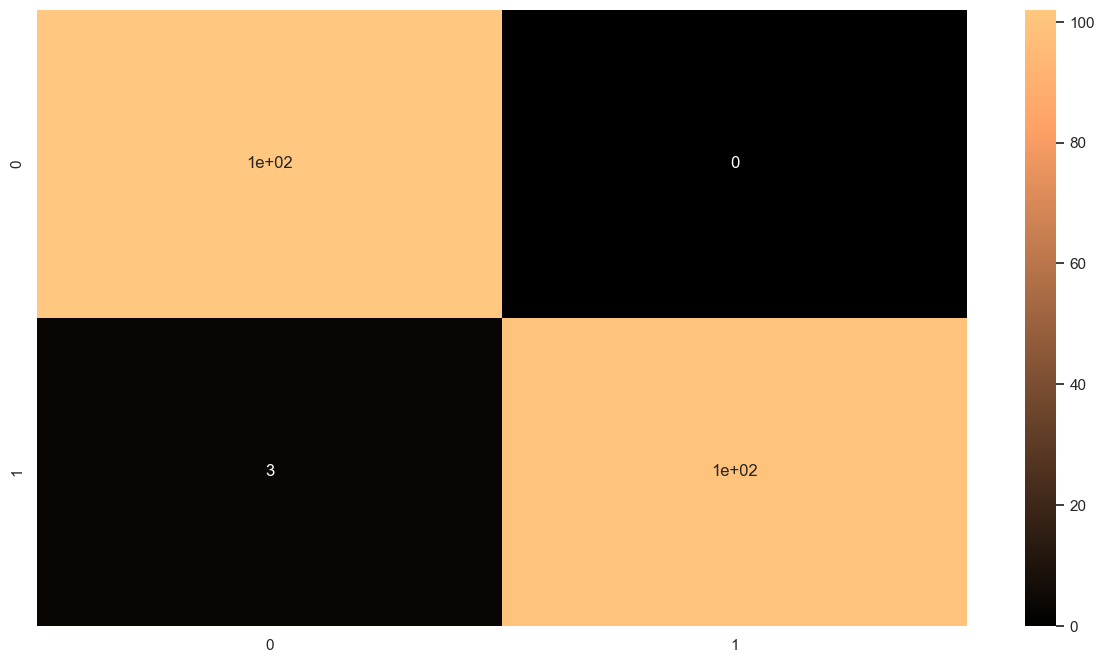

In [198]:
sns.heatmap(confusion_matrix(y_test,RF_pred),annot= True, cmap='copper')
plt.show()

<h2>MODELS PERFORMANCE.</h2>

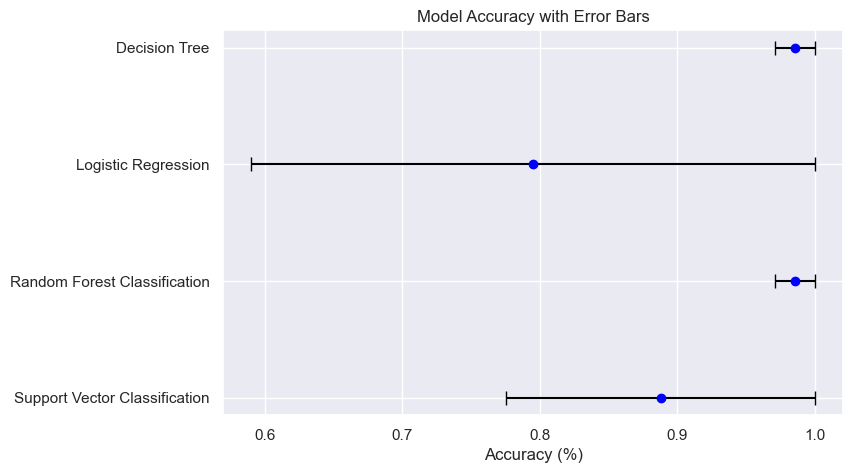

In [199]:
models = ['Support Vector Classification', 'Random Forest Classification',
           'Logistic Regression', 'Decision Tree']

accuracy= [accuracy_score(y_test, svm_pred),accuracy_score(y_test, RF_pred),
          accuracy_score(y_test, L_pred),accuracy_score(y_test, DT_pred)]

errors = [1-accuracy_score(y_test, svm_pred), 1-accuracy_score(y_test, RF_pred),
         1-accuracy_score(y_test, L_pred),1-accuracy_score(y_test, DT_pred)]

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.errorbar(accuracy, models, xerr=errors, fmt='o', color='blue', ecolor='black', capsize=5)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy with Error Bars')
plt.grid(True)
plt.show()

<h2>MODELS PERFORMANCE FOR ACCURACY</h2>

<Axes: title={'center': 'Model Performances'}, xlabel='Algorithms', ylabel='Accuracy score'>

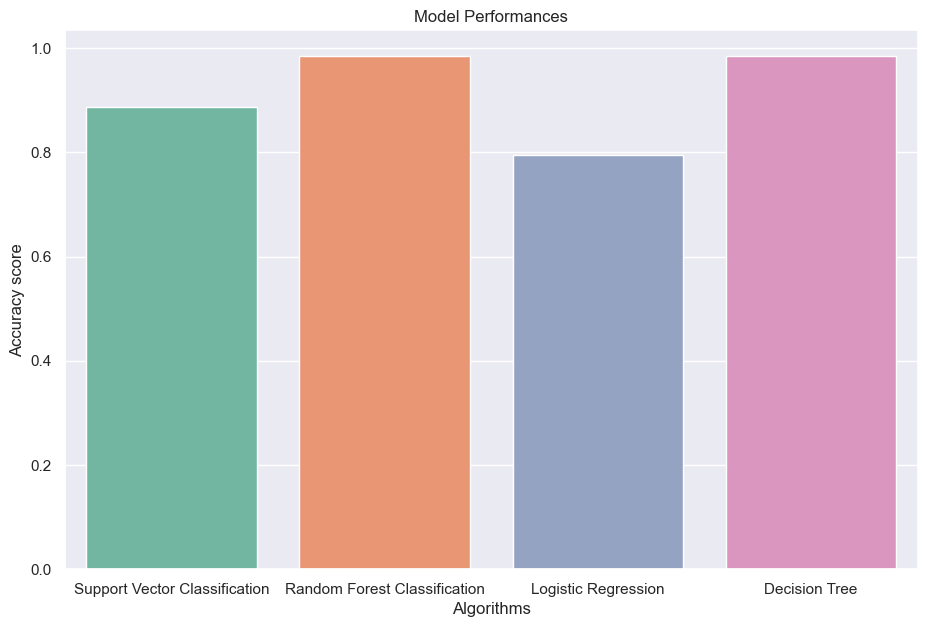

In [200]:
# sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize=(11,7))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Model Performances")

sns.barplot(x=models, y=accuracy, palette="Set2")

In [201]:
pickle.dump(L_model,open("L_model","wb"))
pickle.dump(svm_model,open("svm_model","wb"))
pickle.dump(DT_model,open("DT_model","wb"))
pickle.dump(RF_model,open("RF_model","wb"))